# Roses de Nightingale

#### Préambule

- Commencée en 1853, la guerre de Crimée opposa la Russie à une coalition formée de l'Empire ottoman, du Royaume-Uni, de la France et du Royaume de Sardaigne.
- Au cours de la guerre, beaucoup de soldats décédaient avant même de parvenir au front, dans les hôpitaux à cause des conditions sanitaires déplorables qui favorisaient le choléra, le typhus, la fièvre typhoîde, la dysenterie...

#### Un parcours d'exception :

- Le parcours de Florence Nightingale (1820-1910) est unique en son genre. Durant sa jeunesse, un cousin étudiant à Oxford lui donna goût aux mathématiques et elle sollicita, auprès de ses parents fortunés, le droit d'étudier les mathématiques avec un précepteur puis auprès de grands mathématiciens de l'époques avec notamment Sylvester, etc.)
- Soucieuse des autres, elle devint infirmière et s'interrogea notamment sur les causes de la surmortalité dans les hôpitaux déjà dix ans avant la guerre de Crimée.
- Au mois d'octobre 1854, Florence Nightingale, se rendit dans un des principaux hôpitaux de la coalition en Turquie. Elle s'employa à améliorer les conditions de vie des soldats présents (sanitaires, égouts, etc.)
- En mars 1855, la réfection des locaux fut entreprise. Elle souhaita généraliser ces nouvelles règles sanitaires à l'ensemble des locaux de l'armée (hôpitaux et casernes) et développa parallèlement, telle une pionnière dans le domaine, les cures thermales et régimes alimentaires pour les soldats.
- A cette époque, après la reine Victoria, Florence Nightingale fut le second visage le plus connu d'Angleterre et reste célèbre pour avoir conçu une des premières data visualisations illustrant la surmortalité due aux mauvaises conditions d'hygiène dans les hôpitaux et crée la première école de médecine militaire du pays.

Le fichier nightingale.csv renseigne 4 variables pour chaque mois de la période Avril 1854 à Mars 1855 :
- Le nombre de soldats présents dans l'armée
- Le nombre de morts par maladie (choléra, typhus...)
- Le nombre de morts par blessure après combat
- Le nombre de morts suite à des problèmes autres (malnutrition)

### Traitement du jeu de données

In [19]:
import pandas as pd

T = pd.read_csv('data/Nightingale.csv')
T

,Mois,Taille_armée,Maladies,Blessures,Autres
0,Avri.54,8571,1,0,5
1,Mai.54,23333,12,0,9
2,Juin.54,28333,11,0,6
3,Juil.54,28722,359,0,23
4,Août.54,30246,828,1,30
5,Sept.54,30290,788,81,70
6,Oct.54,30643,503,132,128
7,Nov.54,29736,844,287,106
8,Déc.54,32779,1725,114,131
9,Jan.55,32393,2761,83,324


### Causes de décès pour 1000 soldats de l'armée

- En avril 1854, il y avait un mort par maladie alors qu'il y avait 8571 soldats.
- En mai 1854, il y avait 12 morts par maladie alors qu'il y avait 23333 soldats.

In [20]:
a_1000 = 1000/8571
m_1000 = 12*1000/23333
print('Pour 1000 soldats, en avril, nous avions un taux de mortalité de', round(12*a_1000, 2), 'par an.')
print('Et en mai,', round(12*m_1000, 2), 'par an.')

Pour 1000 soldats, en avril, nous avions un taux de mortalité de 1.4 par an.
Et en mai, 6.17 par an.


On va stocker le nombre de morts "annuels" dans une colonne. On fera la même chose pour les autres causes de morts.

In [21]:
T['M_1000'] = T['Maladies'] / T['Taille_armée'] * 12000
T['B_1000'] = T['Blessures'] / T['Taille_armée'] * 12000
T['A_1000'] = T['Autres'] / T['Taille_armée'] * 12000

### Représentation des causes de décès pour 1000 soldats dans l'armée

- Pour un mois donné et une cause de décès donné, on représente un nombre n de morts 'annuels' par un secteur angulaire dont l'aire est égale à n.
- Pour chaque cause, on représente 12 mois consécutifs dans le même graphique, où les secteurs partent du même centre et on le même angle.

In [22]:
print('Cet angle fera donc', 360/12, 'degrés.')

Cet angle fera donc 30.0 degrés.


- Un secteur a pour aire 'A' et pour rayon 'r'
- On va exprimer 'A' en fonction de 'r' et vice-versa

In [23]:
print("L'aire d'un cercle est égale à pi*r^2")
print('On peut donc dire que A = pi*r^2/12 car il y a 12 mois.')
print('Et donc r = sqrt(12*A/pi)')

L'aire d'un cercle est égale à pi*r^2
On peut donc dire que A = pi*r^2/12 car il y a 12 mois.
Et donc r = sqrt(12*A/pi)


- On sait que A = nombre de morts annuels.
- Pour avril 1854, on a donc 1.4 morts annuels par maladie

In [24]:
print('Donc on aurait r environ =', (12*1.4/3.14)**0.5)

Donc on aurait r environ = 2.313075543802575


In [25]:
from math import pi

T['rM'] = (12/pi * T['M_1000'])**0.5
T['rB'] = (12/pi * T['B_1000'])**0.5
T['rA'] = (12/pi * T['A_1000'])**0.5
T.head()

,Mois,Taille_armée,Maladies,Blessures,Autres,M_1000,B_1000,A_1000,rM,rB,rA
0,Avri.54,8571,1,0,5,1.400070,0.000000,7.000350,2.312547,0.00000,5.171012
1,Mai.54,23333,12,0,9,6.171517,0.000000,4.628638,4.855251,0.00000,4.204770
2,Juin.54,28333,11,0,6,4.658878,0.000000,2.541206,4.218484,0.00000,3.115557
3,Juil.54,28722,359,0,23,149.989555,0.000000,9.609359,23.935703,0.00000,6.058469
4,Août.54,30246,828,1,30,328.506249,0.396747,11.902400,35.423177,1.23104,6.742686


In [26]:
A1 = T.query('index < 12')

In [27]:
import pylab as pl

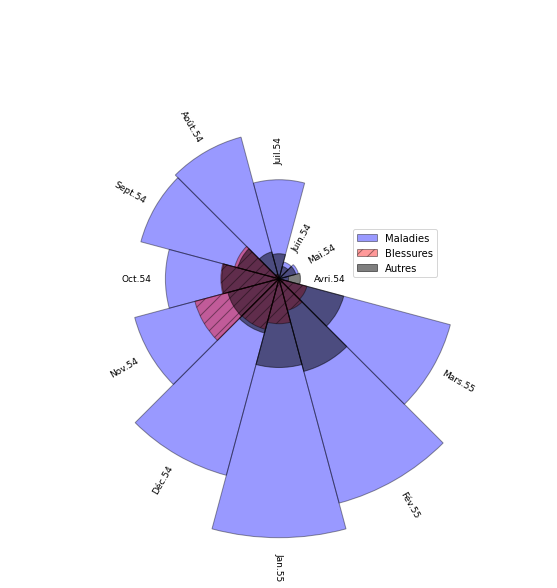

In [31]:
## Environnement de la figure
fig = pl.figure(figsize = (10,10))
angles = [pi/6 * k for k in range(12)]

# Code utile pour les roses sans graduation
ax = pl.subplot(111, projection = 'polar')
ax.set_xticks(angles)
ax.grid(False)
ax.spines['polar'].set_visible(False)
ax.set_xticklabels('')
ax.set_yticklabels('')

# Affichage esthétique des mois
for k in range(12):
    r = max(A1.loc[k, 'rM'], A1.loc[k, 'rB'], A1.loc[k, 'rA'])
    if pi/2 < angles[k] < 3*pi/2:
        ax.text(angles[k], 
                r+7, 
                A1.loc[k, 'Mois'], 
                rotation = 30*k + 180, 
                horizontalalignment = 'center', 
                verticalalignment = 'center', 
                fontsize = 9)
    else:
        ax.text(angles[k],
                r+7,
                A1.loc[k, 'Mois'],
                rotation = 30*k, 
                horizontalalignment = 'center', 
                verticalalignment = 'center',
                fontsize = 9)
    
# Représentation des 3 roses
ax.bar(angles, A1['rM'], width=pi/6, bottom=0,
       facecolor = 'blue', edgecolor = 'black',
       alpha = 0.4, label = 'Maladies')
ax.bar(angles, A1['rB'], width=pi/6, bottom=0,
       facecolor = 'red', hatch='//', edgecolor='black',
       alpha = 0.4, label = 'Blessures')
ax.bar(angles, A1['rA'], width=pi/6, bottom=0,
       facecolor = 'black', edgecolor= 'black',
       alpha = 0.5, label = 'Autres')

ax.legend(bbox_to_anchor = (0.8, 0.6))

- On voit que les soldats mourraient principalement de maladies

###  Rôle de la data visualisation pour convaincre

In [29]:
A2 = T.query('index >= 12' or 'index < 24')

Text(0.5, 1.0, 'Répartition des soldats hospitalisés 1855-1856')

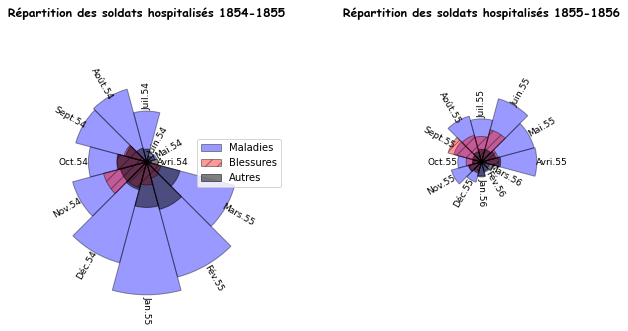

In [37]:
fig = pl.figure(figsize = (11,8))

ax1 = pl.subplot(121, projection = 'polar')
ax1.set_xticks(angles)
ax1.set_xticklabels('')
ax1.grid(False)
ax1.spines["polar"].set_visible(False)
ax1.set_yticklabels('')

for k in range(12):
    r = max(A1.loc[k, 'rM'], A1.loc[k, 'rB'], A1.loc[k, 'rA'])
    if pi/2 < angles[k] < 3*pi/2:
        ax1.text(angles[k], 
                r+7, 
                A1.loc[k, 'Mois'], 
                rotation = 30*k + 180, 
                horizontalalignment = 'center', 
                verticalalignment = 'center', 
                fontsize = 9)
    else:
        ax1.text(angles[k],
                r+7,
                A1.loc[k, 'Mois'],
                rotation = 30*k, 
                horizontalalignment = 'center', 
                verticalalignment = 'center',
                fontsize = 9)
    
# Représentation des 3 roses
ax1.bar(angles, A1['rM'], width=pi/6, bottom=0,
       facecolor = 'blue', edgecolor = 'black',
       alpha = 0.4, label = 'Maladies')
ax1.bar(angles, A1['rB'], width=pi/6, bottom=0,
       facecolor = 'red', hatch='//', edgecolor='black',
       alpha = 0.4, label = 'Blessures')
ax1.bar(angles, A1['rA'], width=pi/6, bottom=0,
       facecolor = 'black', edgecolor= 'black',
       alpha = 0.5, label = 'Autres')

ax1.legend(bbox_to_anchor = (1, 0.6))
ax1.set_title('Répartition des soldats hospitalisés 1854-1855',
              color = 'black', fontweight = 'bold',
              name = 'Comic Sans MS')

ax2 = pl.subplot(122, projection = 'polar')
ax2.set_xticks(angles)
ax2.set_xticklabels('')
ax2.grid(False)
ax2.spines["polar"].set_visible(False)
ax2.set_yticklabels('')

for k in range(12):
    r = max(A2.loc[k+12, 'rM'], A2.loc[k+12, 'rB'], A2.loc[k+12, 'rA'])
    if pi/2 < angles[k] < 3*pi/2:
        ax2.text(angles[k], 
                r+7, 
                A2.loc[k+12, 'Mois'], 
                rotation = 30*k + 180, 
                horizontalalignment = 'center', 
                verticalalignment = 'center', 
                fontsize = 9)
    else:
        ax2.text(angles[k],
                r+7,
                A2.loc[k+12, 'Mois'],
                rotation = 30*k, 
                horizontalalignment = 'center', 
                verticalalignment = 'center',
                fontsize = 9)
    
# Représentation des 3 roses
ax2.bar(angles, A1['rM'], width = pi/6,
        bottom = 0, facecolor = 'white',
        edgecolor = 'white', alpha = 0)
ax2.bar(angles, A2['rM'], width=pi/6, bottom=0,
       facecolor = 'blue', edgecolor = 'black',
       alpha = 0.4, label = 'Maladies')
ax2.bar(angles, A2['rB'], width=pi/6, bottom=0,
       facecolor = 'red', hatch='//', edgecolor='black',
       alpha = 0.4, label = 'Blessures')
ax2.bar(angles, A2['rA'], width=pi/6, bottom=0,
       facecolor = 'black', edgecolor= 'black',
       alpha = 0.5, label = 'Autres')


ax2.set_title('Répartition des soldats hospitalisés 1855-1856',
              color = 'black', fontweight = 'bold',
              name = 'Comic Sans MS')

En novembre 1854, Florence Nightingale impulsa un nettoyage de l'ensemble des hôpitaux dans l'espoir de réduire la mortalité par maladie.

Malgré toute la bonne volonté, la mortalité par maladie atteignit son pic en hiver.

En mars 1855, elle demanda le nettoyage des égouts et l'assainissement de la ventilation dans les hôpitaux.